In [ ]:
import pandas as pd
from Latte import Latte
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

project_to_field = {'biology': 'Science','chemistry': 'Science','physics': 'Science','ell': 'Language','english': 'Language','linguistics': 'Language','graphicdesign': 'Design','photo': 'Design','gamedev': 'Tech','softwareengineering': 'Tech', 'computergraphics': 'Tech'}

In [2]:
def get_masks(df):
    df['field'] = df['project'].map(project_to_field)

    mask1 = np.array(df['field'] == 'Science') * 1
    mask2 = np.array(df['field'] == 'Language') * 2
    mask3 = np.array(df['field'] == 'Design') * 3
    mask4 = np.array(df['field'] == 'Tech') * 4

    df['project_tags'] = df['project'] + '_' + df['tags']
    masks = {
        'field': mask1 + mask2 + mask3 + mask4,
        'tag': pd.factorize(df['project_tags'])[0] + 1,
        'project': pd.factorize(df['project'])[0] + 1
    }
    return masks

In [3]:
def pipeline(sample_size, n_neighbors, min_cluster_size, min_samples, cluster_level, method ='hf', max_titles_per_cluster = 20):
    df = pd.read_csv(f'data/sample_{sample_size}.csv')
    masks = get_masks(df)
    latte = Latte(df)
    latte.embed('file', embeddings_file=f'embeddings/sample_{sample_size}_gemini.pkl')
    latte.reduce(n_neighbors, 0.0).cluster(min_cluster_size, min_samples);
    latte.plot(groups = masks['field'], cluster_level=cluster_level, marker_size=5)
    latte.annotate(method = method, device='mps', max_titles_per_cluster=max_titles_per_cluster)
    return latte, df

In [ ]:
latte, df = pipeline(3, 3, 3, 3, 0)
mask = (df['project'] == 'biology').astype(bool).tolist()
latte.export('qwen_3.json', mask);

Initialized Latte with 99 documents
Loading embeddings from: embeddings/sample_3_gemini.pkl
Embeddings computed successfully. Shape: (99, 768)
Reduced embeddings to shape: (99, 2)
Clustering complete.
Identified leaf 13 clusters.
Annotating 27 clusters across all levels...
Annotating cluster 99 (1/27) with 20 titles...


/Users/aivan/Lab/latte/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Cluster 99 annotation: Software development, programming, linguistics, and physics concepts
Annotating cluster 100 (2/27) with 20 titles...
Cluster 100 annotation: Software development, 3D graphics, photography, and design
Annotating cluster 101 (3/27) with 20 titles...
Cluster 101 annotation: Language, chemistry, and scientific inquiry
Annotating cluster 102 (4/27) with 8 titles...
Cluster 102 annotation: Graphic design software tips and techniques
Annotating cluster 103 (5/27) with 20 titles...
Cluster 103 annotation: Game development, computer graphics, and software programming
Annotating cluster 104 (6/27) with 20 titles...
Cluster 104 annotation: Grammar, vocabulary, and linguistic analysis
Annotating cluster 105 (7/27) with 20 titles...
Cluster 105 annotation: Diverse scientific and linguistic inquiries
Annotating cluster 106 (8/27) with 7 titles...
Cluster 106 annotation: Software design best practices and common issues
Annotating cluster 107 (9/27) with 20 titles...
Cluster 107

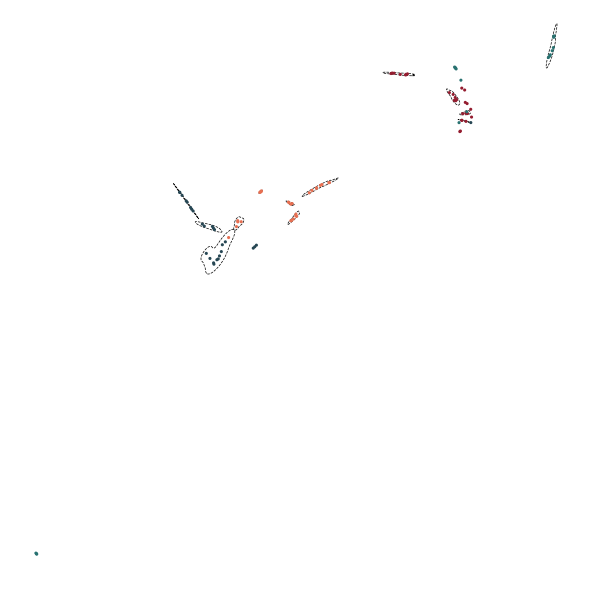

In [4]:
latte, df = pipeline(3, 3, 3, 3, 0, method = 'gemini')
mask = (df['project'] == 'biology').astype(bool).tolist()
latte.export('gemini_3.json', mask);

In [ ]:
latte, df = pipeline(100, 50, 20, 10, 32, 20)
mask = (df['project'] == 'biology').astype(bool).tolist()
latte.export('qwen_100_20.json', mask);

Initialized Latte with 3300 documents
Loading embeddings from: embeddings/sample_100_gemini.pkl
Embeddings computed successfully. Shape: (3300, 768)
Reduced embeddings to shape: (3300, 2)
Clustering complete.
Identified leaf 13 clusters.
Annotating 73 clusters across all levels...
Annotating cluster 3300 (1/73) with 50 titles...


/Users/aivan/Lab/latte/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Using specified device: mps
Loading Hugging Face model: Qwen/Qwen2.5-7B-Instruct


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Model Qwen/Qwen2.5-7B-Instruct loaded and cached
Inference took 6.62 seconds
Cluster 3300 annotation: Various technical and academic inquiries across different fields including graphic design, programming, physics, linguistics, and biology
Annotating cluster 3301 (2/73) with 50 titles...
Using specified device: mps
Using cached model: Qwen/Qwen2.5-7B-Instruct
Inference took 4.34 seconds
Cluster 3301 annotation: Language usage, grammar, and etymology questions
Annotating cluster 3302 (3/73) with 50 titles...
Using specified device: mps
Using cached model: Qwen/Qwen2.5-7B-Instruct
Inference took 5.09 seconds
Cluster 3302 annotation: Technical problems and solutions in various fields including game development, physics, optics, and software engineering
Annotating cluster 3303 (4/73) with 50 titles...
Using specified device: mps
Using cached model: Qwen/Qwen2.5-7B-Instruct
Inference took 3.65 seconds
Cluster 3303 annotation: Adobe InDesign and Photoshop usage and troubleshooting
Annotating

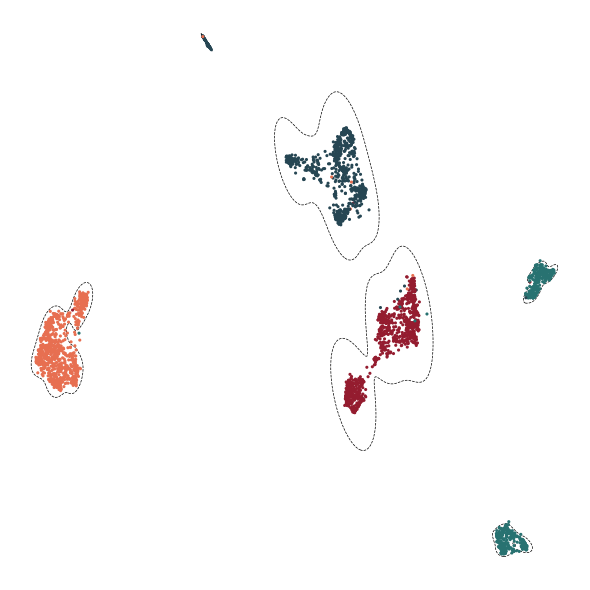

In [4]:
latte, df = pipeline(100, 50, 20, 10, 32, 50)
mask = (df['project'] == 'biology').astype(bool).tolist()
latte.export('qwen_100_50.json', mask);

Initialized Latte with 3300 documents
Loading embeddings from: embeddings/sample_100_gemini.pkl
Embeddings computed successfully. Shape: (3300, 768)
Reduced embeddings to shape: (3300, 2)
Clustering complete.
Identified leaf 13 clusters.
Annotating 73 clusters across all levels...
Annotating cluster 3300 (1/73) with 50 titles...
Cluster 3300 annotation: Technical questions and problems across various fields, including programming, photography, physics, chemistry, grammar, and design
Annotating cluster 3301 (2/73) with 50 titles...
Cluster 3301 annotation: Linguistics and grammar
Annotating cluster 3302 (3/73) with 50 titles...
Cluster 3302 annotation: Technical questions across diverse fields of computing, photography, physics, biology, and design
Annotating cluster 3303 (4/73) with 50 titles...
Cluster 3303 annotation: Troubleshooting and techniques for Adobe Creative Suite applications (Photoshop, Illustrator, InDesign)
Annotating cluster 3304 (5/73) with 50 titles...
Cluster 3304 an

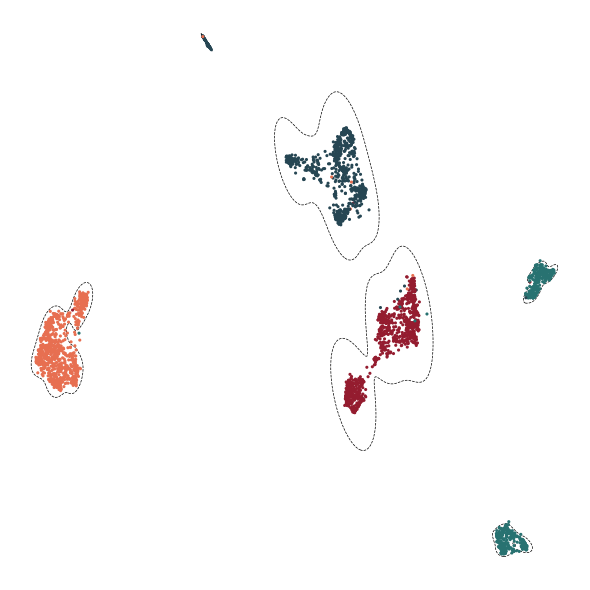

In [5]:
latte, df = pipeline(100, 50, 20, 10, 32, max_titles_per_cluster = 50, method = 'gemini')
mask = (df['project'] == 'biology').astype(bool).tolist()
latte.export('gemini_100_50.json', mask);